# Netcdf and Basemap

### Main goals of this lecture:

1. Open a netcdf file and make a simple plot
2. Make a cross section plot
3. Extract a specific point to a timeseries

### 1. Open a netcdf file and make a simple plot

In [1]:
import numpy as np
from scipy.io import netcdf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
f = netcdf.netcdf_file('r2_reanalysis.nc', 'r')

The file can be iterated to show all of the **variables**

In [3]:
for var in f.variables:
    print var

time_bnds
prate
tmin
level
tmax
v
lon
u
t
time
lat
u10
v10
level_2
level_3


Now we can extract the variables that we want to use. Using the ```[:]``` indicates that a numpy array we be extract, otherwise an python object will be extracted

In [4]:
u = f.variables['u']
v = f.variables['v']
t = f.variables['t']

longitude = f.variables['lon'][:]
latitude = f.variables['lat'][:]
level = f.variables['level'][:]
time = f.variables['time']

print u.shape, longitude.shape, latitude.shape, level.shape, time.shape
print time.units

(182, 17, 73, 144) (144,) (73,) (17,) (182,)
hours since 1800-1-1 00:00:00


In [5]:
print latitude
print longitude
print level

[ 90.   87.5  85.   82.5  80.   77.5  75.   72.5  70.   67.5  65.   62.5
  60.   57.5  55.   52.5  50.   47.5  45.   42.5  40.   37.5  35.   32.5
  30.   27.5  25.   22.5  20.   17.5  15.   12.5  10.    7.5   5.    2.5
   0.   -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5 -25.  -27.5
 -30.  -32.5 -35.  -37.5 -40.  -42.5 -45.  -47.5 -50.  -52.5 -55.  -57.5
 -60.  -62.5 -65.  -67.5 -70.  -72.5 -75.  -77.5 -80.  -82.5 -85.  -87.5
 -90. ]
[   0.     2.5    5.     7.5   10.    12.5   15.    17.5   20.    22.5
   25.    27.5   30.    32.5   35.    37.5   40.    42.5   45.    47.5
   50.    52.5   55.    57.5   60.    62.5   65.    67.5   70.    72.5
   75.    77.5   80.    82.5   85.    87.5   90.    92.5   95.    97.5
  100.   102.5  105.   107.5  110.   112.5  115.   117.5  120.   122.5
  125.   127.5  130.   132.5  135.   137.5  140.   142.5  145.   147.5
  150.   152.5  155.   157.5  160.   162.5  165.   167.5  170.   172.5
  175.   177.5  180.   182.5  185.   187.5  190.   192.5 

**netcdf** uses a type of compression for the variables that requires to be multiplied by an scale factor (```scale_factor```) and added an offset value (```add_offset```). For example, the ```scale_factor``` for the zonal wind U is 0.01 and it's offset value is 187.65. If we don't apply this changes the first element of the ```u``` array is ```u[0,0,0,0] = -18573``` and if we apply those changes it becomes ```u[0,0,0,0] = 1.92```. The module **netCDF4** (http://unidata.github.io/netcdf4-python/) automagically handles those attributes saving up some time.

In [6]:
def unpack(var):
    return var[:] * var.scale_factor + var.add_offset 

In [7]:
u = unpack(u)
v = unpack(v)
t = unpack(t)

The ```np.meshgrid``` returns a coordinate matrice from coordinate vector. In this example it will associate each of the longitudes in ```longitude``` vector to each of the latitudes in ```latitude``` and vice versa. Thereby, an 2D array will be created 

In [8]:
lons, lats = np.meshgrid(longitude, latitude)
print lons.shape, lats.shape

(73, 144) (73, 144)


To plot that data we can use **Basemap** http://matplotlib.org/basemap/users/index.html 

" _The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python (...) Basemap is geared toward the needs of earth scientists, particular oceanographers and meteorologists (...)_ "

In [9]:
from mpl_toolkits.basemap import Basemap

A simple image can be plotted using the **min** and **max** values in the lats and lons variables. We can create a map object **m** defining the lower corner and uper corner longitude and latitude, **llcrnrlon(lat)** and **urcrnrlon(lat)**. 
Then we can use the matplotlib methods to make the temperature and wind plot.

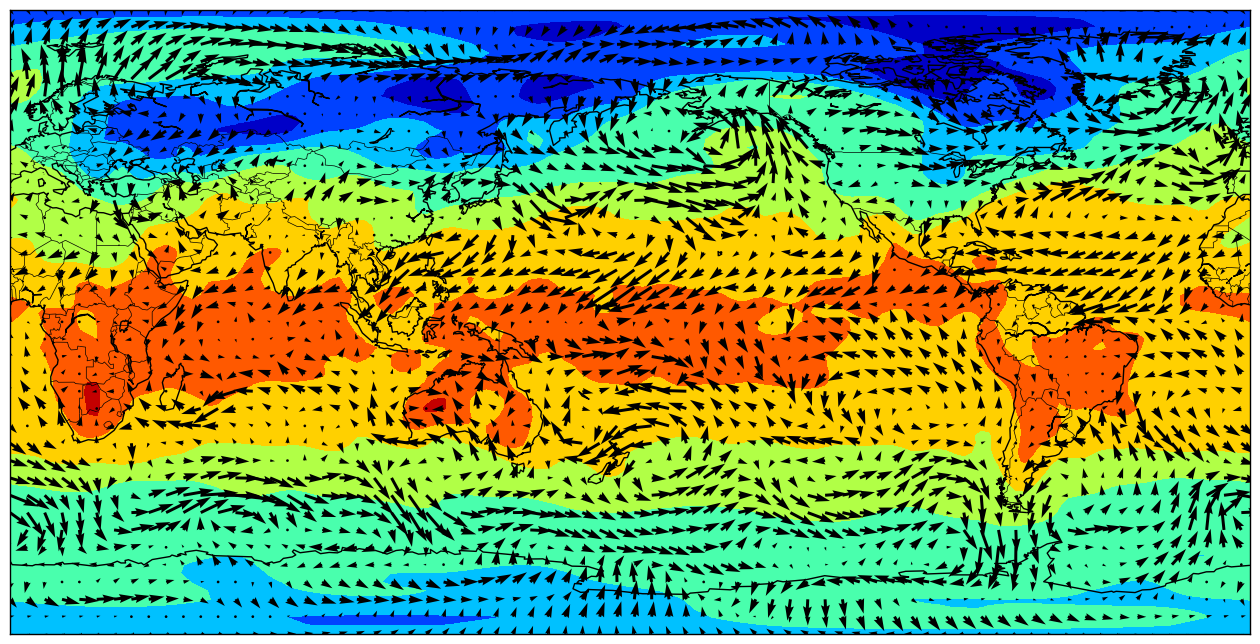

In [10]:
fig = plt.figure(figsize=(16,35))
m = Basemap(llcrnrlon=lons.min(), llcrnrlat=lats.min(), urcrnrlon=lons.max(), urcrnrlat=lats.max())

m.drawcoastlines()
m.drawcountries()

skip = 2

cs = m.contourf(lons, lats, t[0, 0, :, :])
qv = m.quiver(lons[::skip, ::skip], lats[::skip, ::skip], u[0, 0, ::skip, ::skip], v[0, 0, ::skip, ::skip])

There are many different projections to choose from in Basemap:

* Azimuthal Equidistant Projection
* Gnomonic Projection
* **Orthographic Projection**
* Geostationary Projection
* Near-Sided Perspective Projection
* Mollweide Projection
* Hammer Projection
* Robinson Projection
* Eckert IV Projection
* Kavrayskiy VII Projection
* McBryde-Thomas Flat Polar Quartic
* Sinusoidal Projection
* Equidistant Cylindrical Projection
* Cassini Projection
* Mercator Projection
* Transverse Mercator Projection
* Oblique Mercator Projection
* Polyconic Projection
* Miller Cylindrical Projection
* Gall Stereographic Projection
* Cylindrial Equal-Area Projection
* Lambert Conformal Projection
* Lambert Azimuthal Equal Area Projection
* Stereographic Projection
* Equidistant Conic Projection
* Albers Equal Area Projection
* Polar Stereographic Projection
* Polar Lambert Azimuthal Projection
* **Polar Azimuthal Equidistant Projection**
* van der Grinten Projection

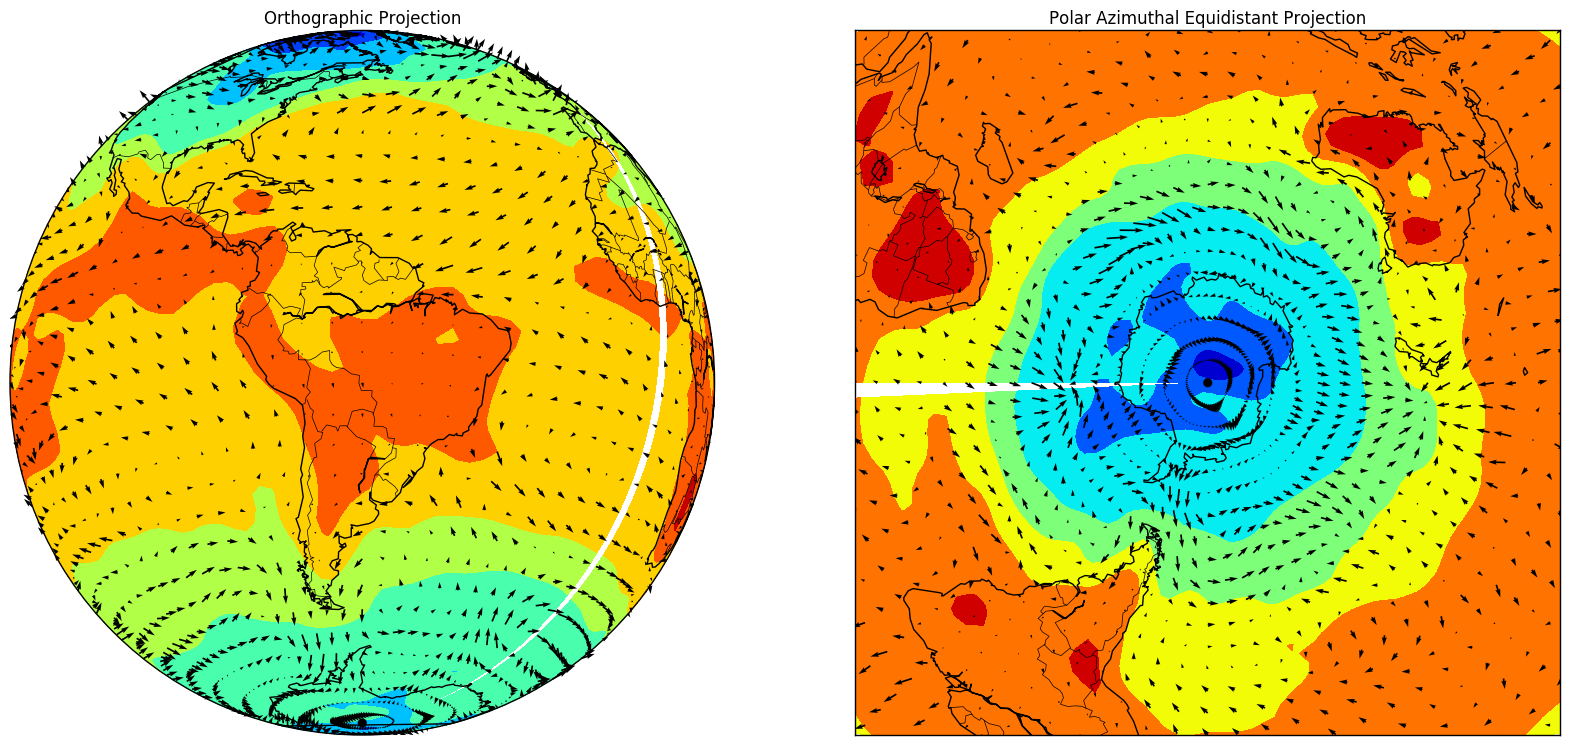

In [11]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(121)
ax1.set_title('Orthographic Projection')

m = Basemap(projection='ortho',lat_0=-15,lon_0=300, ax=ax1)

m.drawcoastlines()
m.drawcountries()

skip = 2

x, y = m(lons, lats)

cs = m.contourf(x, y, t[0, 0, :, :])
qv = m.quiver(x[::skip, ::skip], y[::skip, ::skip], u[0, 0, ::skip, ::skip], v[0, 0, ::skip, ::skip])

###############################################################################################

ax2 = fig.add_subplot(122)
ax2.set_title('Polar Azimuthal Equidistant Projection')

m = Basemap(projection='spaeqd',boundinglat=-10,lon_0=270, ax=ax2)

m.drawcoastlines()
m.drawcountries()

skip = 2

x, y = m(lons, lats)

cs = m.contourf(x, y, t[0, 0, :, :])
qv = m.quiver(x[::skip, ::skip], y[::skip, ::skip], u[0, 0, ::skip, ::skip], v[0, 0, ::skip, ::skip])

### Question: What would happen if i wanted to make a plot between -180 and 180 instead of 0 to 360?

**Answer**: Since my longitude and my variables are ordered from 0 to 360, only a part of the data would be plotted (the part between 0 and 180). The part between -180 and 0 which equals 180 to 360, in the data between 0 and 360 would not be plotted

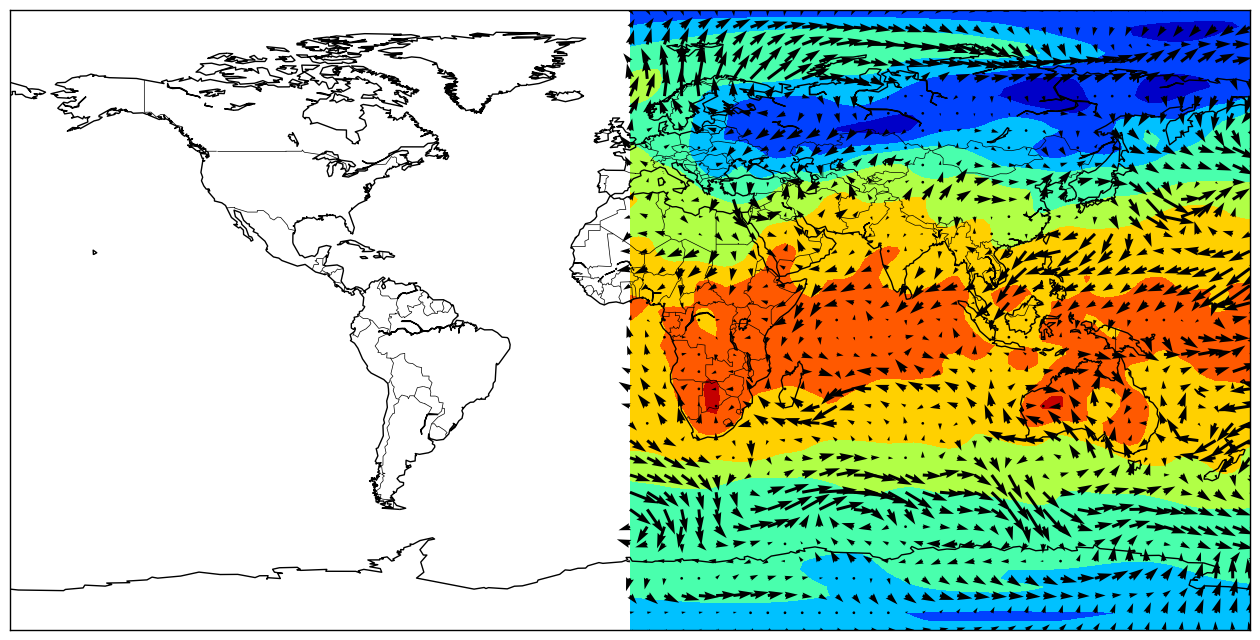

In [12]:
fig = plt.figure(figsize=(16,35))
m = Basemap(llcrnrlon=-180, llcrnrlat=lats.min(), urcrnrlon=180, urcrnrlat=lats.max())

m.drawcoastlines()
m.drawcountries()

skip = 2

cs = m.contourf(lons, lats, t[0, 0, :, :])
qv = m.quiver(lons[::skip, ::skip], lats[::skip, ::skip], u[0, 0, ::skip, ::skip], v[0, 0, ::skip, ::skip])

To reorder the variables and the longitude we can create a ```flip_grid``` function, that takes the longitude and variable to be reordered as arguments. This function will define a filter ```fltr``` that will be True for every longitude higher than 180 and False for values below. The filter will then be used to concatenate the values between -180 to -2.5 with the values between 0 to 177.5 for my longitude vector and my variable

In [13]:
def flip_grid(var, lons):
    fltr = lons >= 180
    # fltr =  [False False False ... True  True  True]
    newlons = np.concatenate(((lons - 360)[fltr], lons[~fltr]), axis=-1)
    # newlons = [-180 -177.5 -175 ... -5 -2.5 ] concatenated with [0 2.5 5 ... 175 177.5]
    # newlons = [-180 -177.5 -175 ... 175 177.5 180]
    if var.ndim == 2:
        newvar = np.concatenate((var[:, fltr], var[:, ~fltr]), axis=-1)
    elif var.ndim == 3:
        newvar = np.concatenate((var[:, :, fltr], var[:, :, ~fltr]), axis=-1)
    elif var.ndim == 4:
        newvar = np.concatenate((var[:, :, :, fltr], var[:, :, :, ~fltr]), axis=-1)        
        
    return newvar, newlons

The ```flip_grid``` is then used to reorder **u**, **v** and **t** variables

In [14]:
u, newlon = flip_grid(u, longitude)
v, newlon = flip_grid(v, longitude)
t, newlon = flip_grid(t, longitude)

print newlon

[-180.  -177.5 -175.  -172.5 -170.  -167.5 -165.  -162.5 -160.  -157.5
 -155.  -152.5 -150.  -147.5 -145.  -142.5 -140.  -137.5 -135.  -132.5
 -130.  -127.5 -125.  -122.5 -120.  -117.5 -115.  -112.5 -110.  -107.5
 -105.  -102.5 -100.   -97.5  -95.   -92.5  -90.   -87.5  -85.   -82.5
  -80.   -77.5  -75.   -72.5  -70.   -67.5  -65.   -62.5  -60.   -57.5
  -55.   -52.5  -50.   -47.5  -45.   -42.5  -40.   -37.5  -35.   -32.5
  -30.   -27.5  -25.   -22.5  -20.   -17.5  -15.   -12.5  -10.    -7.5
   -5.    -2.5    0.     2.5    5.     7.5   10.    12.5   15.    17.5
   20.    22.5   25.    27.5   30.    32.5   35.    37.5   40.    42.5
   45.    47.5   50.    52.5   55.    57.5   60.    62.5   65.    67.5
   70.    72.5   75.    77.5   80.    82.5   85.    87.5   90.    92.5
   95.    97.5  100.   102.5  105.   107.5  110.   112.5  115.   117.5
  120.   122.5  125.   127.5  130.   132.5  135.   137.5  140.   142.5
  145.   147.5  150.   152.5  155.   157.5  160.   162.5  165.   167.5
  170.

In [15]:
lons, lats = np.meshgrid(newlon, latitude)

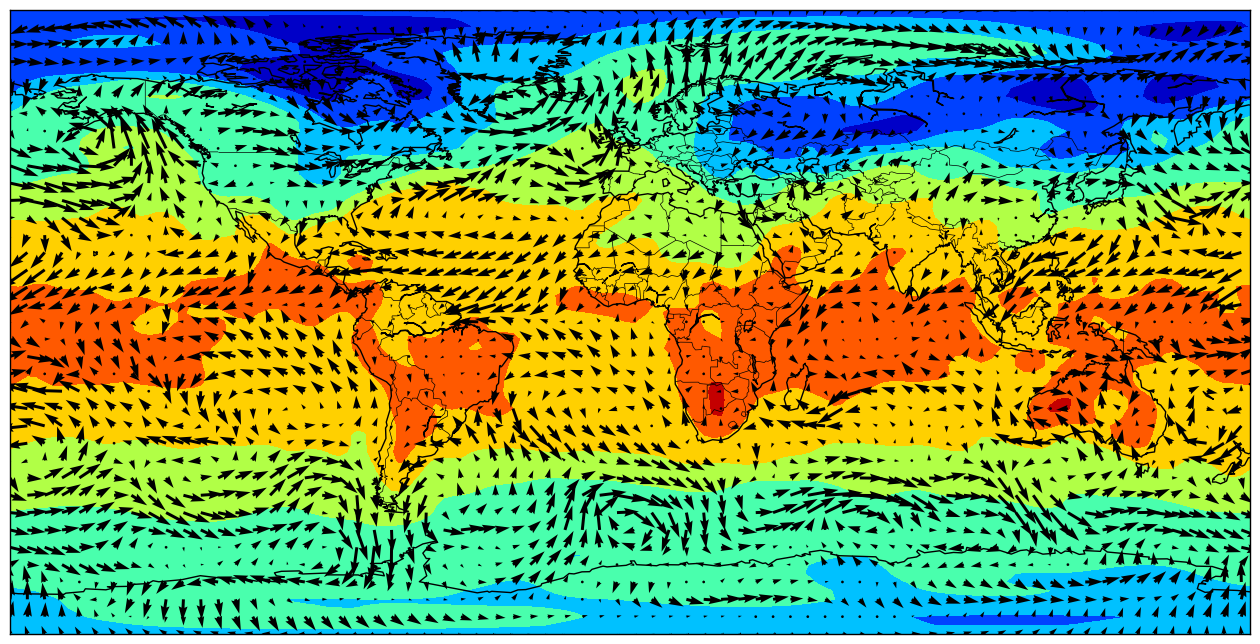

In [16]:
fig = plt.figure(figsize=(16,35))
m = Basemap(llcrnrlon=lons.min(), llcrnrlat=lats.min(), urcrnrlon=lons.max(), urcrnrlat=lats.max())

m.drawcoastlines()
m.drawcountries()

skip = 2

cs = m.contourf(lons, lats, t[0, 0, :, :])
qv = m.quiver(lons[::skip, ::skip], lats[::skip, ::skip], u[0, 0, ::skip, ::skip], v[0, 0, ::skip, ::skip])

### 2. Make a cross section plot

Next, a function ```find_nearest``` is created to find the nearest grid point for a given location, based on the distance between points

In [17]:
def find_nearest(x, y, gridx, gridy):

    distance = (gridx - x)**2 + (gridy - y)**2
    idx = np.where(distance == distance.min())
    # idx = (array([45]), array([0]))
    
    return [idx[0][0], idx[1][0]]

Using, for example, the latitude and longitude of São Paulo (**lat = -23.650000** and **lon = -46.616667**)

In [18]:
idx = find_nearest(-46.616667, -23.650000, lons, lats)

print lons[idx[0], idx[1]], lats[idx[0], idx[1]]

-47.5 -22.5


Selecting the index ```idx[1]```, which means the longitude we can make a plot for ```u[0, :, :, idx[1]]``` which is the zonal wind for all levels, all latitudes in the nearest longitude to -46.616667

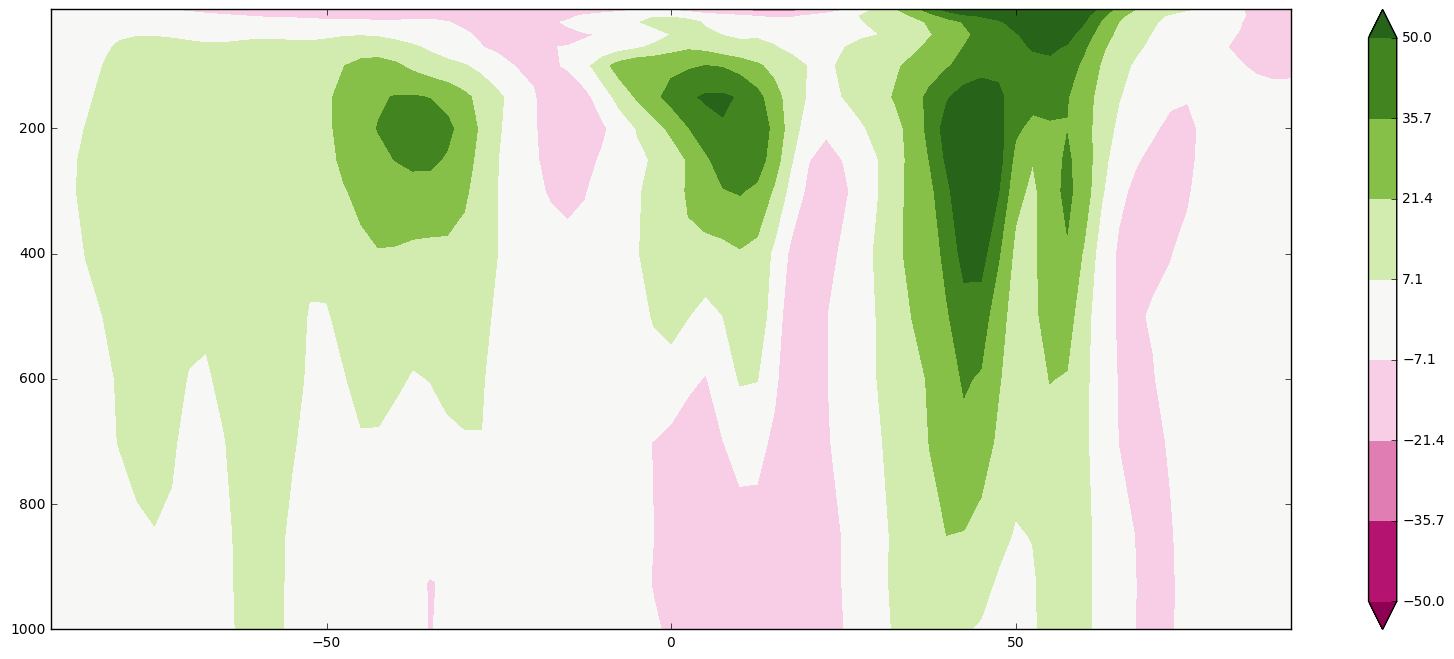

In [19]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlats, levs = np.meshgrid(lats[:, idx[1]], level)

clevs = np.linspace(-50, 50, 8)
cs = ax.contourf(newlats, levs, u[0, :, :, idx[1]], clevs, cmap='PiYG', extend='both')
cbar = plt.colorbar(cs)
ax.invert_yaxis()

### 3. Extract a specific point to a timeseries

The idea is to extract a time series for the variables near the surface. This means a dataframe of this kind:
                  
2016-01-01  300.700012  
2016-01-02  299.500000  
2016-01-03  299.279999  
2016-01-04  298.349976  
...

First we need to take a look in the time variable...

In [20]:
print time[:]

[ 1893408.  1893432.  1893456.  1893480.  1893504.  1893528.  1893552.
  1893576.  1893600.  1893624.  1893648.  1893672.  1893696.  1893720.
  1893744.  1893768.  1893792.  1893816.  1893840.  1893864.  1893888.
  1893912.  1893936.  1893960.  1893984.  1894008.  1894032.  1894056.
  1894080.  1894104.  1894128.  1894152.  1894176.  1894200.  1894224.
  1894248.  1894272.  1894296.  1894320.  1894344.  1894368.  1894392.
  1894416.  1894440.  1894464.  1894488.  1894512.  1894536.  1894560.
  1894584.  1894608.  1894632.  1894656.  1894680.  1894704.  1894728.
  1894752.  1894776.  1894800.  1894824.  1894848.  1894872.  1894896.
  1894920.  1894944.  1894968.  1894992.  1895016.  1895040.  1895064.
  1895088.  1895112.  1895136.  1895160.  1895184.  1895208.  1895232.
  1895256.  1895280.  1895304.  1895328.  1895352.  1895376.  1895400.
  1895424.  1895448.  1895472.  1895496.  1895520.  1895544.  1895568.
  1895592.  1895616.  1895640.  1895664.  1895688.  1895712.  1895736.
  1895

Dates in netcdf files are generally computed as hours or days since an especific date. The ```ncdump -h``` for file r2.nc:


        double time(time) ;
                time:standard_name = "time" ;
                time:long_name = "Time" ;
                time:bounds = "time_bnds" ;
                time:units = "hours since 1800-1-1 00:00:00" ;
                time:calendar = "standard" ;
                time:axis = "T" ;



In [21]:
print time.units

hours since 1800-1-1 00:00:00


We may now import ```datetime``` and ```timedelta``` to make a list with datetime objects instead of those float. In the **netCDF4** this convertion is as easy as ``` dates = netCDF4.num2date(time[:], time.units) ```

In [22]:
from datetime import datetime, timedelta

In [23]:
def get_dates(time):
    splited_date = time.units.split()
    # splited_date = ['hours', 'since', '1800-1-1', '00:00:00']
    start_date_string = ' '.join(splited_date[-2:])
    # start_date_string = 1800-1-1 00:00:00
    # convert string into datetime object
    start_date = datetime.strptime(start_date_string, '%Y-%m-%d %H:%M:%S')
    
    dates = [start_date + timedelta(hours=i) for i in time[:]]
    return dates

In [24]:
dates = get_dates(time)
print dates

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0), datetime.datetime(2016, 1, 3, 0, 0), datetime.datetime(2016, 1, 4, 0, 0), datetime.datetime(2016, 1, 5, 0, 0), datetime.datetime(2016, 1, 6, 0, 0), datetime.datetime(2016, 1, 7, 0, 0), datetime.datetime(2016, 1, 8, 0, 0), datetime.datetime(2016, 1, 9, 0, 0), datetime.datetime(2016, 1, 10, 0, 0), datetime.datetime(2016, 1, 11, 0, 0), datetime.datetime(2016, 1, 12, 0, 0), datetime.datetime(2016, 1, 13, 0, 0), datetime.datetime(2016, 1, 14, 0, 0), datetime.datetime(2016, 1, 15, 0, 0), datetime.datetime(2016, 1, 16, 0, 0), datetime.datetime(2016, 1, 17, 0, 0), datetime.datetime(2016, 1, 18, 0, 0), datetime.datetime(2016, 1, 19, 0, 0), datetime.datetime(2016, 1, 20, 0, 0), datetime.datetime(2016, 1, 21, 0, 0), datetime.datetime(2016, 1, 22, 0, 0), datetime.datetime(2016, 1, 23, 0, 0), datetime.datetime(2016, 1, 24, 0, 0), datetime.datetime(2016, 1, 25, 0, 0), datetime.datetime(2016, 1, 26, 0, 0), datetime.datetime(20

We read now the variables near the surface (**t2**, **u10**, **v10**, **prate**)

In [25]:
u10 = f.variables['u10']
v10 = f.variables['v10']
prate = f.variables['prate']
tmax = f.variables['tmax']
tmin = f.variables['tmin']

print u10.shape, prate.units

(182, 1, 73, 144) Kg/m^2/s


The values of the variables are then unpacked and the grid is fliped from 0 to 360 to -180 to 180

In [26]:
u10 = unpack(u10)
v10 = unpack(v10)
prate = unpack(prate)
tmax = unpack(tmax)
tmin = unpack(tmin)

u10, newlon = flip_grid(u10, longitude)
v10, newlon = flip_grid(v10, longitude)
prate, newlon = flip_grid(prate, longitude)
tmax, newlon = flip_grid(tmax, longitude)
tmin, newlon = flip_grid(tmin, longitude)

In [27]:
lons, lats = np.meshgrid(newlon, latitude)

We find then grid point of the latitude and longitude that we want

In [28]:
idx = find_nearest(-46.248889, -22.880833, lons, lats)

Import pandas to create a dataframe with dates as index and then save it to a csv file

In [29]:
import pandas as pd

tx2C = tmax - 273.15 # K to oC
tm2C = tmin - 273.15 # K to oC
acum = prate * 3600. * 24. # mm/s mm/day

data = {'u10': u10[:, 0, idx[0], idx[1]], 'v10': v10[:, 0, idx[0], idx[1]], 'prec': acum[:, idx[0], idx[1]], \
        'tmax': tx2C[:, 0, idx[0], idx[1]], 'tmin': tm2C[:, 0, idx[0], idx[1]]}

df = pd.DataFrame(data, index=dates)

print df

                 prec       tmax       tmin       u10       v10
2016-01-01  28.287354  27.130005  22.820007  1.259995 -0.330002
2016-01-02  19.500477  24.510010  22.410004 -2.180008  1.959991
2016-01-03  30.196798  23.690002  22.010010 -5.009995  3.709991
2016-01-04   2.488319  23.730011  20.540009 -6.699997  2.449997
2016-01-05   0.552944  24.720001  20.050018 -6.630005 -0.199997
2016-01-06   0.008630  26.760010  19.910004 -5.449997 -0.350006
2016-01-07   0.008630  28.420013  20.510010 -3.830002 -0.570007
2016-01-08   0.008630  28.949982  22.279999 -3.580002 -0.880005
2016-01-09  32.054382  27.160004  22.690002 -3.610001 -1.300003
2016-01-10   4.112631  25.760010  22.380005 -1.430008 -2.910004
2016-01-11   1.615662  26.800018  22.519989  0.800003 -4.610001
2016-01-12  35.959671  23.720001  22.279999 -0.479996 -4.009995
2016-01-13  59.382717  24.899994  22.490021 -1.210007 -0.509995
2016-01-14  38.119667  25.050018  22.110016 -2.419998  4.000000
2016-01-15  30.784304  24.670013  22.050

In [30]:
df.to_csv('data.csv', sep=';')